# Graduate Project: Africa Soil Prediction

## Loading Data

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
data = pd.read_csv('training.csv')
data.replace(['Topsoil','Subsoil'], [1,0],inplace=True)
X = data.iloc[:,1:-5].values
Y = data.iloc[:, -5:].values
data.head()

,PIDN,m7497.96,m7496.04,m7494.11,m7492.18,m7490.25,m7488.32,m7486.39,m7484.46,m7482.54,...,REF7,RELI,TMAP,TMFI,Depth,Ca,P,pH,SOC,Sand
0,XNhoFZW5,0.302553,0.301137,0.299748,0.300354,0.302679,0.303799,0.301702,0.298936,0.298126,...,-0.646673,1.687734,0.190708,0.056843,1,-0.295749,-0.041336,-1.129366,0.353258,1.269748
1,9XNspFTd,0.270192,0.268555,0.266964,0.267938,0.271013,0.272346,0.269870,0.266976,0.266544,...,-0.646673,1.687734,0.190708,0.056843,0,-0.387442,-0.231552,-1.531538,-0.264023,1.692209
2,WDId41qG,0.317433,0.316265,0.314948,0.315224,0.316942,0.317764,0.316067,0.313874,0.313301,...,-0.814516,1.806660,0.190708,0.056843,1,-0.248601,-0.224635,-0.259551,0.064152,2.091835
3,JrrJf1mN,0.261116,0.259767,0.258384,0.259001,0.261310,0.262417,0.260534,0.258039,0.257246,...,-0.814516,1.806660,0.190708,0.056843,0,-0.332195,-0.318014,-0.577548,-0.318719,2.118477
4,ZoIitegA,0.260038,0.258425,0.256544,0.257030,0.259602,0.260786,0.258717,0.256352,0.255902,...,-0.780242,0.430513,0.190708,0.056843,1,-0.438350,-0.010210,-0.699135,-0.310905,2.164148


## Explroatory Data Analysis

Visualizing Spectral Features

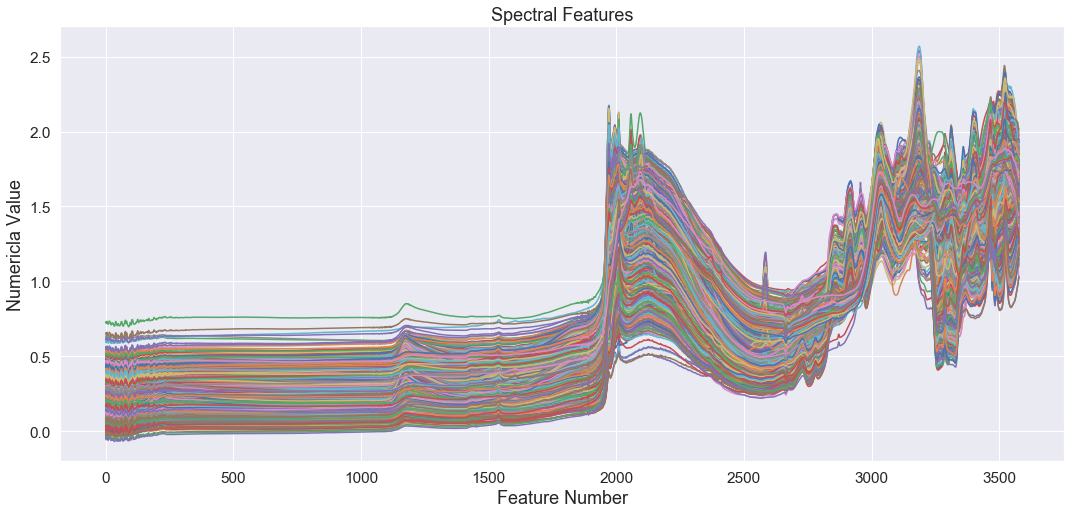

In [22]:
plt.figure(figsize=(18,8))
plt.plot(X[:,:3578].T)
plt.title("Spectral Features",fontsize = 18)
plt.xlabel("Feature Number",fontsize = 18)
plt.ylabel("Numericla Value",fontsize = 18)
plt.show()

Visualizing Spatial Features

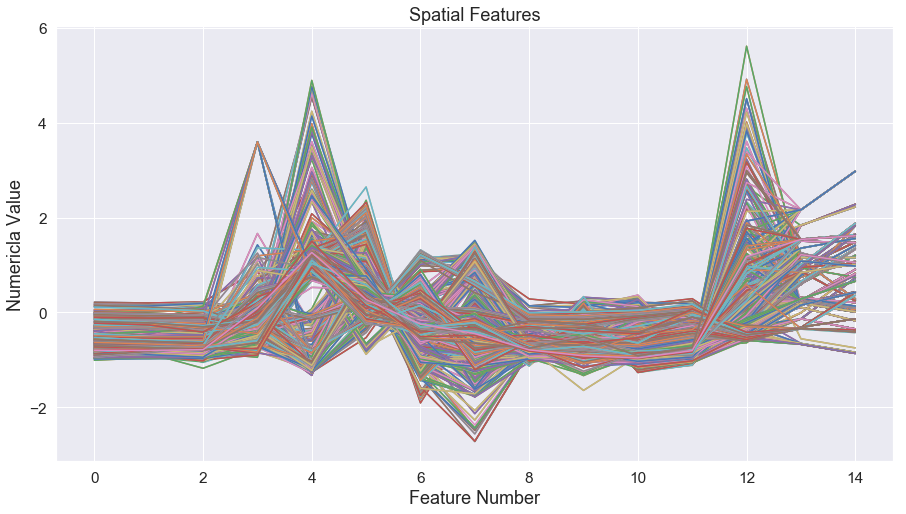

In [23]:
plt.figure(figsize=(15,8))
plt.plot(X[:,3578:-1].T)
plt.title("Spatial Features",fontsize = 18)
plt.xlabel("Feature Number",fontsize = 18)
plt.ylabel("Numericla Value",fontsize = 18)
plt.show()

Summary of Target Variables

In [9]:
data.iloc[:,-5:].describe()

,Ca,P,pH,SOC,Sand
count,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000
mean,0.006442,-0.014524,-0.028543,0.080414,-0.012646
std,1.070541,0.995469,0.920224,1.141989,0.988520
min,-0.535828,-0.418309,-1.886946,-0.857863,-1.493378
25%,-0.451077,-0.345681,-0.717841,-0.615639,-0.899649
50%,-0.348682,-0.269595,-0.175376,-0.349974,-0.134651
75%,-0.042654,-0.089755,0.376442,0.275121,0.786391
max,9.645815,13.266841,3.416117,7.619989,2.251685


Distributions of Target Variables

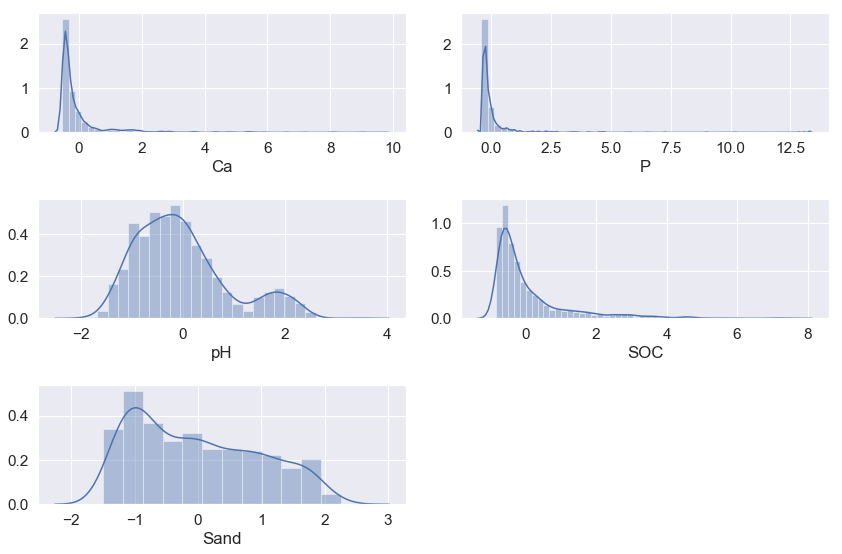

In [18]:
plt.figure(figsize=(12,8))
for i in range(5):
    plt.subplot(3,2,5-i)
    sns.distplot(data.iloc[:,-(i+1)])
plt.tight_layout()

## Pre-Processing Data

### PCA

No of PCs needed to capture  99.0 % of total variance:   9


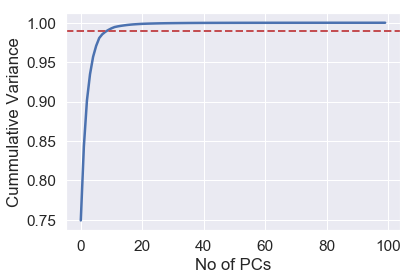

In [25]:
from sklearn.decomposition import PCA

req_var = 0.99
pca = PCA(n_components = 100).fit(X[:,:3578])
X1 = pca.transform(X[:,:3578])

explained_variance = pca.explained_variance_ratio_
cumvar = np.cumsum(explained_variance)
req_pcs = sum(cumvar <= req_var)

plt.plot(cumvar,linewidth=2.5)
plt.axhline(y=req_var,color='r',linewidth=2,linestyle='--')
plt.xlabel('No of PCs')
plt.ylabel('Cummulative Variance')
print('No of PCs needed to capture ',100*req_var,'% of total variance:  ',req_pcs)

In [51]:
pca = PCA(n_components = 9).fit(X[:,:3578])
X1 = pca.transform(X[:,:3578])

### Compiling Data

In [76]:
target_list = list(data.columns[-5:])
spatial_features = list(data.columns[3579:-5])
pc_names = ['pc'+str(i+1) for i in range(9)]
df_X_train = pd.DataFrame(data=X_train,columns=pc_names+spatial_features)
df_Y_train = pd.DataFrame(data=Y, columns=target_list)
df_train = pd.concat([df_X_train, df_Y_train],axis=1)
df_train.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,BSAN,...,REF7,RELI,TMAP,TMFI,Depth,Ca,P,pH,SOC,Sand
0,-0.859207,-0.187747,-1.191987,-0.120110,-0.153358,-0.212347,-0.998779,-0.599475,-1.766220,-0.247019,...,-0.025158,1.313484,-0.573636,-0.835825,1.0,-0.295749,-0.041336,-1.129366,0.353258,1.269748
1,-1.151357,-0.831183,-1.412989,-0.478258,-0.519528,-0.830505,-1.506502,0.160331,-0.940059,-0.247019,...,-0.025158,1.313484,-0.573636,-0.835825,0.0,-0.387442,-0.231552,-1.531538,-0.264023,1.692209
2,-0.253080,0.171812,-0.392091,-0.374026,0.752880,-0.300086,-0.168768,-1.423285,-2.141159,-0.769787,...,-0.539509,1.424195,-0.573636,-0.835825,1.0,-0.248601,-0.224635,-0.259551,0.064152,2.091835
3,-0.023145,-0.124583,-0.502498,-0.381295,0.319967,-0.588371,-0.289980,-1.061124,-1.621839,-0.769787,...,-0.539509,1.424195,-0.573636,-0.835825,0.0,-0.332195,-0.318014,-0.577548,-0.318719,2.118477
4,-0.332384,0.086287,-1.156977,0.244337,0.581059,-0.554091,-1.303588,0.203948,-1.393182,-0.493028,...,-0.434476,0.143108,-0.573636,-0.835825,1.0,-0.438350,-0.010210,-0.699135,-0.310905,2.164148


### Feature Selection

In [61]:
from sklearn.feature_selection import SelectFromModel, SelectKBest, f_regression, RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#### Correlation Based

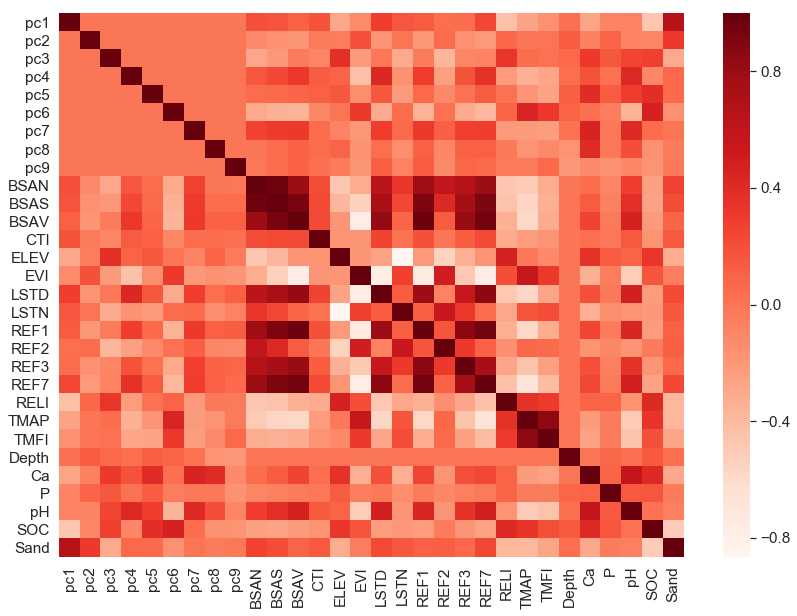

In [93]:
# determine correlations between features and targets
plt.figure(figsize=(14,10))
cor = df_train.corr()
sns.heatmap(cor, cmap=plt.cm.Reds)
plt.show()

In [94]:
cor_Ca = abs(cor["Ca"])
cor_P = abs(cor["P"])
cor_pH = abs(cor["pH"])
cor_SOC = abs(cor["SOC"])
cor_Sand = abs(cor["Sand"])

**Top 10 Features for each Target Variable**

In [95]:
cor_Ca[:25].sort_values(ascending=False)[:10]

pc7     0.458471
pc8     0.408984
pc5     0.400343
ELEV    0.362972
LSTN    0.332076
EVI     0.327112
pc3     0.310434
pc1     0.266141
BSAV    0.263353
REF1    0.250876
Name: Ca, dtype: float64

In [96]:
cor_P[:25].sort_values(ascending=False)[:10]

pc9      0.160139
pc3      0.158112
ELEV     0.141005
LSTN     0.133063
pc5      0.127376
REF2     0.103065
RELI     0.096194
pc2      0.091358
BSAN     0.086978
Depth    0.086251
Name: P, dtype: float64

In [97]:
cor_pH[:25].sort_values(ascending=False)[:10]

EVI     0.513890
TMAP    0.506728
REF7    0.495338
LSTD    0.488740
BSAV    0.463579
TMFI    0.448033
REF1    0.445185
pc4     0.420395
pc7     0.410104
BSAS    0.373307
Name: pH, dtype: float64

In [98]:
cor_SOC[:25].sort_values(ascending=False)[:10]

pc1     0.469551
pc6     0.460975
RELI    0.413573
pc5     0.386323
TMAP    0.347731
ELEV    0.329959
pc3     0.274508
REF7    0.258446
BSAS    0.256360
BSAN    0.243566
Name: SOC, dtype: float64

In [99]:
cor_Sand[:25].sort_values(ascending=False)[:10]

pc1     0.662444
RELI    0.377149
TMAP    0.376067
ELEV    0.317674
pc2     0.308302
pc3     0.298321
TMFI    0.267645
BSAN    0.266298
REF7    0.239233
LSTD    0.233953
Name: Sand, dtype: float64

#### Select K Best

In [79]:
regressor = RandomForestRegressor()
select = SelectFromModel(regressor, threshold="median")
select.fit(df_X_train, Y[:,0])
# transform training set
X_train_selected = select.transform(df_X_train)
print("X_train.shape: {}".format(df_X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (1157, 25)
X_train_selected.shape: (1157, 13)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Index(['pc1', 'pc2', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'ELEV', 'LSTD',
       'REF1', 'REF3', 'TMFI'],
      dtype='object')


([], <a list of 0 Text yticklabel objects>)

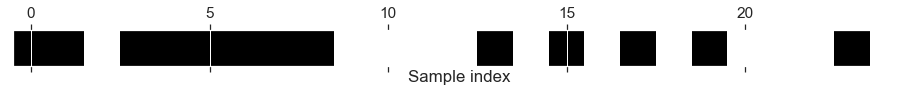

In [80]:
mask = select.get_support()
print(df_X_train.columns[mask])
# visualize the mask -- black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

#### SelectFromModel

In [77]:
regressor = RandomForestRegressor()
select = SelectFromModel(regressor, threshold="median")
select.fit(df_X_train, Y[:,0])
# transform training set
X_train_selected = select.transform(df_X_train)
print("X_train.shape: {}".format(df_X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (1157, 25)
X_train_selected.shape: (1157, 13)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Index(['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'ELEV',
       'EVI', 'REF7', 'TMFI'],
      dtype='object')


([], <a list of 0 Text yticklabel objects>)

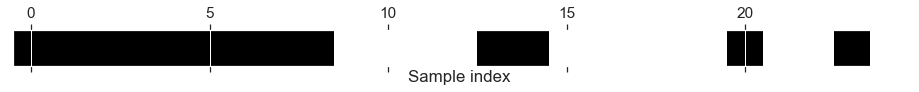

In [78]:
mask = select.get_support()
print(df_X_train.columns[mask])
# visualize the mask -- black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

#### RFE

In [81]:
regressor = RandomForestRegressor()
select = RFE(regressor, 5, step=1)
select = select.fit(df_X_train, Y[:,0])
# transform training set
X_train_selected = select.transform(df_X_train)
print("X_train.shape: {}".format(df_X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))
print(select.support_) 
print(select.ranking_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

X_train.shape: (1157, 25)
X_train_selected.shape: (1157, 5)
[False False False False False  True  True  True False False False False
 False  True False False False False False False False False False  True
 False]
[ 2 15  6  4  3  1  1  1  5 17 11 20 14  1  9  8 12 13 16  7 10 21 18  1
 19]


Index(['pc6', 'pc7', 'pc8', 'ELEV', 'TMFI'], dtype='object')


([], <a list of 0 Text yticklabel objects>)

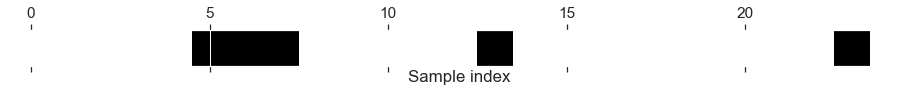

In [82]:
mask = select.get_support()
print(df_X_train.columns[mask])
# visualize the mask -- black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

#### Feature Importance

Text(0.5, 1.0, 'Feature Rankings for Ca')

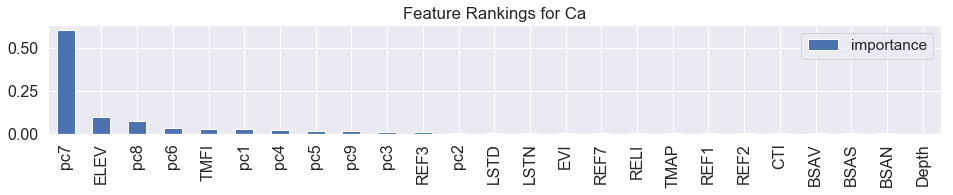

In [88]:
RFR_reg = RandomForestRegressor(n_estimators = 100).fit(df_X_train, Y[:,0])
feature_importances = pd.DataFrame(RFR_reg.feature_importances_,
                                   index = df_X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances.iloc[:50,:].plot.bar(figsize=(16,2),fontsize=16)
plt.title("Feature Rankings for Ca")

Text(0.5, 1.0, 'Feature Rankings for P')

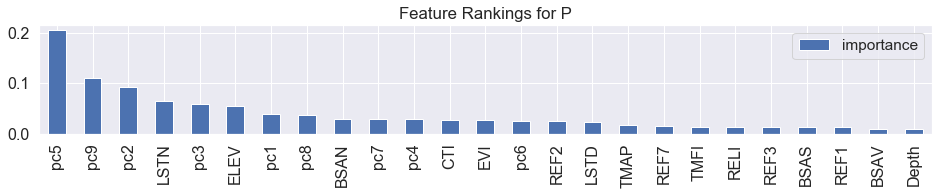

In [89]:
RFR_reg = RandomForestRegressor(n_estimators = 100).fit(df_X_train, Y[:,1])
feature_importances = pd.DataFrame(RFR_reg.feature_importances_,
                                   index = df_X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances.iloc[:50,:].plot.bar(figsize=(16,2),fontsize=16)
plt.title("Feature Rankings for P")

Text(0.5, 1.0, 'Feature Rankings for pH')

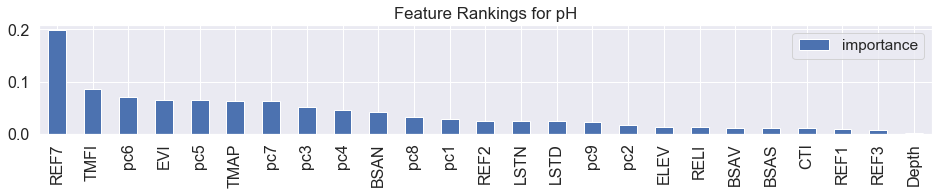

In [90]:
RFR_reg = RandomForestRegressor(n_estimators = 100).fit(df_X_train, Y[:,2])
feature_importances = pd.DataFrame(RFR_reg.feature_importances_,
                                   index = df_X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances.iloc[:50,:].plot.bar(figsize=(16,2),fontsize=16)
plt.title("Feature Rankings for pH")

Text(0.5, 1.0, 'Feature Rankings for SOC')

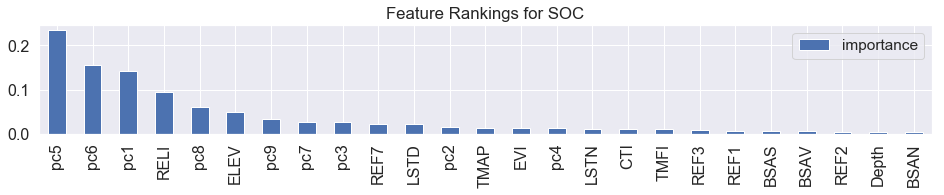

In [91]:
RFR_reg = RandomForestRegressor(n_estimators = 100).fit(df_X_train, Y[:,3])
feature_importances = pd.DataFrame(RFR_reg.feature_importances_,
                                   index = df_X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances.iloc[:50,:].plot.bar(figsize=(16,2),fontsize=16)
plt.title("Feature Rankings for SOC")

Text(0.5, 1.0, 'Feature Rankings for Sand')

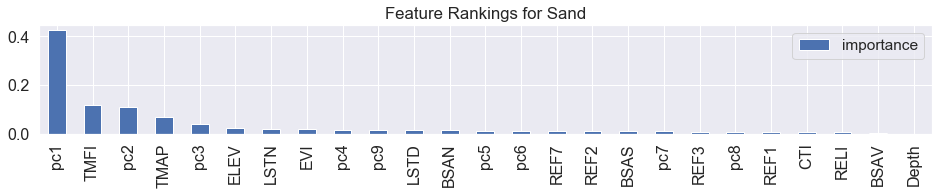

In [92]:
RFR_reg = RandomForestRegressor(n_estimators = 100).fit(df_X_train, Y[:,4])
feature_importances = pd.DataFrame(RFR_reg.feature_importances_,
                                   index = df_X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances.iloc[:50,:].plot.bar(figsize=(16,2),fontsize=16)
plt.title("Feature Rankings for Sand")

### Feature Scaling

In [100]:
X_train = np.concatenate((X1,X[:,3578:]),axis=1)
sc = StandardScaler() 
X_train[:,:-1] = sc.fit_transform(X_train[:,:-1])

## Regression Models

In [101]:
# linear models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
# non-linear models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

#neural network
from sklearn.neural_network import MLPRegressor

# ensemble models
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, ExtraTreesRegressor,\
                                AdaBoostRegressor, GradientBoostingRegressor
# gridsearch
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from scipy.stats import randint, uniform
#metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [102]:
def metrics(ytrue,yhat):#,k):
    MAE = mean_absolute_error(ytrue,yhat)
    MSE = mean_squared_error(ytrue,yhat)
    RMSE= np.sqrt(MSE)
    R2  = r2_score(ytrue,yhat)
    #adj_R2 = 1 - (1-R2)*(len(ytrue)-1)/(len(ytrue)-k-1)
    print('RMSE:',RMSE,'R-squared:',R2)#,'Adj R-squared:',adj_R2)
    plt.scatter(ytrue,yhat)
    plt.plot([min(ytrue),max(ytrue)],[min(ytrue),max(ytrue)], 'k--', lw=3)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    return RMSE, R2#,adj_R2

In [103]:
def train_regressor(regressor, df_X_train, df_Y_train,param_grid=None,RSCV=False,n_iter=20):
    scoring = 'neg_mean_squared_error'
    if param_grid==None:
        NMSE_scores = cross_val_score(regressor, df_X_train, df_Y_train, cv=5, scoring=scoring,n_jobs=-1)
        RMSE_scores = np.sqrt(-NMSE_scores)
        print("Mean RMSE: ", RMSE_scores.mean())
        print("Std RMSE : ", RMSE_scores.std())
        return regressor
    else:            
        if RSCV:
            grid = RandomizedSearchCV(regressor, param_grid, n_iter=n_iter, cv=5, scoring=scoring,n_jobs=-1)
        else:
            grid = GridSearchCV(regressor, param_grid, cv=5, scoring=scoring,n_jobs=-1)
        grid.fit(df_X_train, df_Y_train)
        print("RMSE: ",np.sqrt(-grid.best_score_))
        print("Best Parameters: ",grid.best_params_)
        #print("Best Estimator: ",grid.best_estimator_)
        return grid

In [115]:
def compare_models(models, model_names,X,y,target):
    RMSE = []
    scoring = 'neg_mean_squared_error'
    print('Comparing models performaces for target variable /',target,'/')
    for model,name in zip(models,model_names):
        NMSE_scores = cross_val_score(model, X, y, cv=5, scoring=scoring,n_jobs=-1)
        RMSE_scores = np.sqrt(-NMSE_scores)
        rmse_mean = RMSE_scores.mean()
        rmse_std  = RMSE_scores.std()
        RMSE.append(rmse_mean)
        print('RMSE_Mean:',round(rmse_mean,4),'\tRMSE_Std:',round(rmse_std,4),'\tModel:',name)
    return RMSE

### Linear Models

#### Linear Regression

In [33]:
lr = LinearRegression()
lr = train_regressor(lr,X_train,Y[:,0])

Mean RMSE:  0.6781468338002876
Std RMSE :  0.21433917728907195


#### Ridge Regression

In [34]:
ridge = Ridge()
ridge = train_regressor(ridge,X_train,Y[:,0])

Mean RMSE:  0.6637367379201364
Std RMSE :  0.21028678389202143


In [35]:
#param_grid = {'alpha':[0.01,0.1,1,10,100]}
param_grid = {'alpha':list(np.arange(1.5,5,0.1))}
ridge = Ridge()
ridge = train_regressor(ridge,X_train,Y[:,0],param_grid,RSCV=True)

RMSE:  0.6831984833534852
Best Parameters:  {'alpha': 4.8000000000000025}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### Non Linear Models

#### KNN

In [36]:
knn = KNeighborsRegressor()
knn = train_regressor(knn,X_train,Y[:,0])

Mean RMSE:  0.5237689924257436
Std RMSE :  0.28699916742666715


In [37]:
neighbors_range = list(np.arange(2,30,1))
#neighbors_range = [4,5,6,7,8]
param_grid = dict(n_neighbors=neighbors_range)
knn = KNeighborsRegressor()
knn = train_regressor(knn,X_train,Y[:,0],param_grid,RSCV=False)

RMSE:  0.5930595105273564
Best Parameters:  {'n_neighbors': 7}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


#### SVR - Linear

In [38]:
svr_lin = SVR(kernel='linear')
svr_lin = train_regressor(svr_lin, X_train,Y[:,0])

Mean RMSE:  0.6752538510101724
Std RMSE :  0.46296239613163115


In [ ]:
#GridSearch
param_grid = {'C': list(np.arange(10,50,1))}
#param_grid = {'C': [0.001,0.005,0.01,0.05,0.1,0.5,1,3, 10, 30, 60, 100]}
svr_lin = SVR(kernel='linear')
svr_lin = train_regressor(svr_lin, X_train,Y[:,0],param_grid,RSCV=True)

#### SVR-Poly

In [ ]:
svr_lin = SVR(kernel='poly')
svr_lin = train_regressor(svr_lin, X_train,Y[:,0])

In [ ]:
#GridSearch
param_grid = {'C': list(np.arange(10,50,1))}
#param_grid = {'C': [0.001,0.005,0.01,0.05,0.1,0.5,1,3, 10, 30, 60, 100]}
svr_lin = SVR(kernel='poly')
svr_lin = train_regressor(svr_lin, X_train,Y[:,0],param_grid,RSCV=True)

#### SVR-RBF

In [ ]:
svr_lin = SVR(kernel='rbf')
svr_lin = train_regressor(svr_lin, X_train,Y[:,0])

In [ ]:
#GridSearch
param_grid = {'C': list(np.arange(10,50,1))}
#param_grid = {'C': [0.001,0.005,0.01,0.05,0.1,0.5,1,3, 10, 30, 60, 100]}
svr_lin = SVR(kernel='rbf')
svr_lin = train_regressor(svr_lin, X_train,Y[:,0],param_grid,RSCV=True)

### Ensemble Models

#### Bagging Regressor

In [39]:
bag_reg = BaggingRegressor(DecisionTreeRegressor(),n_estimators=50)
bag_reg = train_regressor(bag_reg, X_train,Y[:,0])

Mean RMSE:  0.6751087732207182
Std RMSE :  0.4957189444758296


In [40]:
# GridSearchCV
param_grid = {#"n_estimators":randint(20, 300)
              #"max_depth": list(np.arange(2, 23,1)),
              "max_features": list(np.arange(2, 23,1))
              #"min_samples_split": randint(2, 11),
              #"min_samples_leaf": randint(1, 11),
              #"bootstrap": [True, False]
             }
bag_reg = BaggingRegressor(DecisionTreeRegressor(),n_estimators=50)
bag_reg = train_regressor(bag_reg, X_train,Y[:,0],param_grid,RSCV=True)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RMSE:  0.7735180343743134
Best Parameters:  {'max_features': 11}


#### Random Forest Regressor

In [39]:
rf = RandomForestRegressor(n_estimators=50)
rf = train_regressor(rf, X_train,Y[:,0])

Mean RMSE:  0.6751087732207182
Std RMSE :  0.4957189444758296


In [ ]:
# GridSearchCV
param_grid = {#"n_estimators":randint(20, 300)
              #"max_depth": list(np.arange(2, 23,1)),
              "max_features": list(np.arange(2, 23,1))
              #"min_samples_split": randint(2, 11),
              #"min_samples_leaf": randint(1, 11),
              #"bootstrap": [True, False]
             }
rf = RandomForestRegressor(n_estimators=50)
rf = train_regressor(rf, X_train,Y[:,0],param_grid,RSCV=True)

#### Extra Tree Regressor

In [41]:
extra_tree = ExtraTreesRegressor(n_estimators=50)
extra_tree = train_regressor(extra_tree, X_train,Y[:,0])

Mean RMSE:  0.614225909416892
Std RMSE :  0.3756304556860292


In [ ]:
# GridSearchCV
param_grid = {#"n_estimators":randint(20, 300)
              #"max_depth": list(np.arange(2, 23,1)),
              "max_features": list(np.arange(2, 23,1))
              #"min_samples_split": randint(2, 11),
              #"min_samples_leaf": randint(1, 11),
              #"bootstrap": [True, False]
             }
extra_tree = ExtraTreesRegressor(n_estimators=50)
extra_tree = train_regressor(extra_tree, X_train,Y[:,0],param_grid,RSCV=True)

#### Ada Boost Regressor

In [39]:
ada_boost = AdaBoostRegressor(DecisionTreeRegressor(),n_estimators=50)
ada_boost = train_regressor(ada_boost, X_train,Y[:,0])

Mean RMSE:  0.6751087732207182
Std RMSE :  0.4957189444758296


In [ ]:
# GridSearchCV
param_grid = {#"n_estimators":randint(20, 300)
              #"max_depth": list(np.arange(2, 23,1)),
              "max_features": list(np.arange(2, 23,1))
              #"min_samples_split": randint(2, 11),
              #"min_samples_leaf": randint(1, 11),
              #"bootstrap": [True, False]
             }
ada_boost = AdaBoostRegressor(DecisionTreeRegressor(),n_estimators=50)
ada_boost = train_regressor(ada_boost, X_train,Y[:,0],param_grid,RSCV=True)

#### Gradient Boosting Regressor

In [39]:
grad_boost= GradientBoostingRegressor(max_features= 6, max_depth=7, learning_rate=0.1)
grad_boost = train_regressor(grad_boost, X_train,Y[:,0])

Mean RMSE:  0.6751087732207182
Std RMSE :  0.4957189444758296


In [ ]:
# GridSearchCV
param_grid = {#"n_estimators":randint(20, 300)
              #"max_depth": list(np.arange(2, 23,1)),
              "max_features": list(np.arange(2, 23,1))
              #"min_samples_split": randint(2, 11),
              #"min_samples_leaf": randint(1, 11),
              #"bootstrap": [True, False]
             }
grad_boost= GradientBoostingRegressor(max_features= 6, max_depth=7, learning_rate=0.1)
grad_boost = train_regressor(grad_boost, X_train,Y[:,0],param_grid,RSCV=True)

### Optimal Models

####  Ca

In [116]:
# Linear Models
lr = LinearRegression()
ridge = Ridge(alpha=10.5)
lasso = Lasso(alpha=2e-05)

# Non-Linear Models
knn = KNeighborsRegressor(n_neighbors=2)
svr_lin = SVR(kernel='linear',C=4)
svr_poly = SVR(kernel='poly',C=3.68)
#svr_rbf = SVR(kernel='rbf',C=2.75,gamma=0.013)
svr_rbf = SVR(kernel='rbf',C=4)
dt = DecisionTreeRegressor(max_depth=2,max_features=4)

# Ensemble Models
bag_reg = BaggingRegressor(DecisionTreeRegressor(max_depth=4),max_features=4,n_estimators=150)
rf = RandomForestRegressor(max_features=5,n_estimators=150)
extra_tree = ExtraTreesRegressor(n_estimators=150,max_features=10)
ada_boost = AdaBoostRegressor(DecisionTreeRegressor(max_features=7),n_estimators=150)
grad_boost= GradientBoostingRegressor()

In [117]:
models = [lr,ridge,knn,svr_lin,svr_poly,svr_rbf,bag_reg,rf,extra_tree,ada_boost,grad_boost]
model_names = ['LinearRegression','Ridge','KNN','SVR_Linear','SVR_Poly','SVR_RBF','BaggingRegressor',\
               'RandomForestRegressor','ExtraTreeRegressor','AdaBoostRegressor','GradientBoostingRegressor']
RMSE_Ca = compare_models(models,model_names,X_train,Y[:,0],'Ca')

Comparing models performaces for target variable / Ca /
RMSE_Mean: 0.6781 	RMSE_Std: 0.2143 	Model: LinearRegression
RMSE_Mean: 0.6386 	RMSE_Std: 0.2153 	Model: Ridge
RMSE_Mean: 0.5524 	RMSE_Std: 0.2791 	Model: KNN
RMSE_Mean: 0.6806 	RMSE_Std: 0.4605 	Model: SVR_Linear
RMSE_Mean: 0.5749 	RMSE_Std: 0.353 	Model: SVR_Poly
RMSE_Mean: 0.5426 	RMSE_Std: 0.3529 	Model: SVR_RBF
RMSE_Mean: 0.7479 	RMSE_Std: 0.4936 	Model: BaggingRegressor
RMSE_Mean: 0.6514 	RMSE_Std: 0.4214 	Model: RandomForestRegressor
RMSE_Mean: 0.5915 	RMSE_Std: 0.3684 	Model: ExtraTreeRegressor
RMSE_Mean: 0.6031 	RMSE_Std: 0.4787 	Model: AdaBoostRegressor
RMSE_Mean: 0.6257 	RMSE_Std: 0.4336 	Model: GradientBoostingRegressor


#### P

In [122]:
# Linear Models
lr = LinearRegression()
ridge_reg = Ridge(alpha=280)

# Non-Linear Models
knn = KNeighborsRegressor(n_neighbors=4)
svr_lin = SVR(kernel='linear',C=0.1)
svr_poly = SVR(kernel='poly',C=1.55)
svr_rbf = SVR(kernel='rbf',C=3.8,gamma=2.4)
dt = DecisionTreeRegressor(max_depth=5)

# Ensemble Models
bag_reg = BaggingRegressor(DecisionTreeRegressor(),n_estimators=150)
rf = RandomForestRegressor(max_features=16,max_depth=11,n_estimators=150)
extra_tree = ExtraTreesRegressor(n_estimators=150,max_depth=20)
ada_boost = AdaBoostRegressor(DecisionTreeRegressor(max_features=7),learning_rate=0.1,n_estimators=150)
grad_boost= GradientBoostingRegressor()

In [123]:
models = [lr,ridge,knn,svr_lin,svr_poly,svr_rbf,bag_reg,rf,extra_tree,ada_boost,grad_boost]
model_names = ['LinearRegression','Ridge','KNN','SVR_Linear','SVR_Poly','SVR_RBF','BaggingRegressor',\
               'RandomForestRegressor','ExtraTreeRegressor','AdaBoostRegressor','GradientBoostingRegressor']
RMSE_P = compare_models(models,model_names,X_train,Y[:,1],'P')

Comparing models performaces for target variable / P /
RMSE_Mean: 1.0048 	RMSE_Std: 0.2972 	Model: LinearRegression
RMSE_Mean: 0.9848 	RMSE_Std: 0.3072 	Model: Ridge
RMSE_Mean: 1.0809 	RMSE_Std: 0.3342 	Model: KNN
RMSE_Mean: 0.925 	RMSE_Std: 0.4124 	Model: SVR_Linear
RMSE_Mean: 0.9509 	RMSE_Std: 0.3827 	Model: SVR_Poly
RMSE_Mean: 0.9243 	RMSE_Std: 0.3812 	Model: SVR_RBF
RMSE_Mean: 1.074 	RMSE_Std: 0.2809 	Model: BaggingRegressor
RMSE_Mean: 1.0372 	RMSE_Std: 0.2714 	Model: RandomForestRegressor
RMSE_Mean: 1.062 	RMSE_Std: 0.3034 	Model: ExtraTreeRegressor
RMSE_Mean: 0.933 	RMSE_Std: 0.3872 	Model: AdaBoostRegressor
RMSE_Mean: 1.1022 	RMSE_Std: 0.3298 	Model: GradientBoostingRegressor


#### pH

In [124]:
# Linear Models
lr = LinearRegression()
ridge_reg = Ridge(alpha=10.5)
lasso_reg = Lasso(alpha= 2e-05)

# Non-Linear Models
knn = KNeighborsRegressor(n_neighbors=5)
svr_lin = SVR(kernel='linear',C=0.065)
svr_poly = SVR(kernel='poly',C=2.1)
svr_rbf = SVR(kernel='rbf',C=5.7,gamma=0.045)
dt = DecisionTreeRegressor(max_depth= 8, max_features= 8)

# Ensemble Models
bag_reg = BaggingRegressor(DecisionTreeRegressor(max_depth=10),max_features=8,n_estimators=150)
rf = RandomForestRegressor(n_estimators=150,max_features=8)
extra_tree = ExtraTreesRegressor(n_estimators=150)
ada_boost = AdaBoostRegressor(DecisionTreeRegressor(max_features=6),learning_rate=0.1,n_estimators=150)
grad_boost= GradientBoostingRegressor(max_features= 6, max_depth=7, learning_rate=0.1)

In [125]:
models = [lr,ridge,knn,svr_lin,svr_poly,svr_rbf,bag_reg,rf,extra_tree,ada_boost,grad_boost]
model_names = ['LinearRegression','Ridge','KNN','SVR_Linear','SVR_Poly','SVR_RBF','BaggingRegressor',\
               'RandomForestRegressor','ExtraTreeRegressor','AdaBoostRegressor','GradientBoostingRegressor']
RMSE_pH = compare_models(models,model_names,X_train,Y[:,2],'pH')

Comparing models performaces for target variable / pH /
RMSE_Mean: 0.6194 	RMSE_Std: 0.1179 	Model: LinearRegression
RMSE_Mean: 0.572 	RMSE_Std: 0.0766 	Model: Ridge
RMSE_Mean: 0.6672 	RMSE_Std: 0.1069 	Model: KNN
RMSE_Mean: 0.5726 	RMSE_Std: 0.0811 	Model: SVR_Linear
RMSE_Mean: 0.7188 	RMSE_Std: 0.1007 	Model: SVR_Poly
RMSE_Mean: 0.5991 	RMSE_Std: 0.0827 	Model: SVR_RBF
RMSE_Mean: 0.6528 	RMSE_Std: 0.0417 	Model: BaggingRegressor
RMSE_Mean: 0.6451 	RMSE_Std: 0.0333 	Model: RandomForestRegressor
RMSE_Mean: 0.6325 	RMSE_Std: 0.0523 	Model: ExtraTreeRegressor
RMSE_Mean: 0.6228 	RMSE_Std: 0.0474 	Model: AdaBoostRegressor
RMSE_Mean: 0.6412 	RMSE_Std: 0.0491 	Model: GradientBoostingRegressor


#### SOC

In [126]:
# Linear Models
lr = LinearRegression()
ridge = Ridge(alpha=0.16)
lasso = Lasso(alpha= 0.01)

# Non-Linear Models
knn = KNeighborsRegressor(n_neighbors=4)
svr_lin = SVR(kernel='linear',C=1)
svr_poly = SVR(kernel='poly',C=3)
svr_rbf = SVR(kernel='rbf',C=175,gamma=0.004)
dt = DecisionTreeRegressor()

# Ensemble Models
bag_reg = BaggingRegressor(DecisionTreeRegressor(),n_estimators=150)
rf = RandomForestRegressor(n_estimators=150)
extra_tree = ExtraTreesRegressor(n_estimators=150)
ada_boost = AdaBoostRegressor(DecisionTreeRegressor(),n_estimators=150)
grad_boost= GradientBoostingRegressor(max_features= 6, max_depth=7, learning_rate=0.1)

In [127]:
models = [lr,ridge,knn,svr_lin,svr_poly,svr_rbf,bag_reg,rf,extra_tree,ada_boost,grad_boost]
model_names = ['LinearRegression','Ridge','KNN','SVR_Linear','SVR_Poly','SVR_RBF','BaggingRegressor',\
               'RandomForestRegressor','ExtraTreeRegressor','AdaBoostRegressor','GradientBoostingRegressor']
RMSE_SOC = compare_models(models,model_names,X_train,Y[:,3],'SOC')

Comparing models performaces for target variable / SOC /
RMSE_Mean: 0.7078 	RMSE_Std: 0.1894 	Model: LinearRegression
RMSE_Mean: 0.7062 	RMSE_Std: 0.1898 	Model: Ridge
RMSE_Mean: 0.9304 	RMSE_Std: 0.3141 	Model: KNN
RMSE_Mean: 0.6582 	RMSE_Std: 0.2534 	Model: SVR_Linear
RMSE_Mean: 0.9352 	RMSE_Std: 0.222 	Model: SVR_Poly
RMSE_Mean: 0.5923 	RMSE_Std: 0.2117 	Model: SVR_RBF
RMSE_Mean: 0.6705 	RMSE_Std: 0.2514 	Model: BaggingRegressor
RMSE_Mean: 0.6713 	RMSE_Std: 0.2431 	Model: RandomForestRegressor
RMSE_Mean: 0.698 	RMSE_Std: 0.2752 	Model: ExtraTreeRegressor
RMSE_Mean: 0.6866 	RMSE_Std: 0.2988 	Model: AdaBoostRegressor
RMSE_Mean: 0.7172 	RMSE_Std: 0.2543 	Model: GradientBoostingRegressor


#### Sand

In [128]:
# Linear Models
lr = LinearRegression()
lasso = Lasso()
ridge = Ridge()

# Non-Linear Models
knn = KNeighborsRegressor(n_neighbors=6)
svr_lin = SVR(kernel='linear',C=1.5)
svr_poly = SVR(kernel='poly',C=1.96)
svr_rbf = SVR(kernel='rbf',C=2.95,gamma=0.05)
dt = DecisionTreeRegressor(max_depth=5)

# Ensemble Models
bag_reg = BaggingRegressor(DecisionTreeRegressor(max_depth=7),n_estimators=150)
rf = RandomForestRegressor(n_estimators=150,max_features=7)
extra_tree = ExtraTreesRegressor(n_estimators=150,max_features=7)
ada_boost = AdaBoostRegressor(DecisionTreeRegressor(max_depth=7),n_estimators=150)
grad_boost= GradientBoostingRegressor(max_features= 6, max_depth=7, learning_rate=0.1)


In [129]:
models = [lr,ridge,knn,svr_lin,svr_poly,svr_rbf,bag_reg,rf,extra_tree,ada_boost,grad_boost]
model_names = ['LinearRegression','Ridge','KNN','SVR_Linear','SVR_Poly','SVR_RBF','BaggingRegressor',\
               'RandomForestRegressor','ExtraTreeRegressor','AdaBoostRegressor','GradientBoostingRegressor']
RMSE_Sand = compare_models(models,model_names,X_train,Y[:,4],'Sand')

Comparing models performaces for target variable / Sand /
RMSE_Mean: 0.7022 	RMSE_Std: 0.1853 	Model: LinearRegression
RMSE_Mean: 0.6989 	RMSE_Std: 0.1881 	Model: Ridge
RMSE_Mean: 0.9517 	RMSE_Std: 0.232 	Model: KNN
RMSE_Mean: 0.6306 	RMSE_Std: 0.197 	Model: SVR_Linear
RMSE_Mean: 0.9066 	RMSE_Std: 0.1019 	Model: SVR_Poly
RMSE_Mean: 0.7488 	RMSE_Std: 0.1777 	Model: SVR_RBF
RMSE_Mean: 0.7913 	RMSE_Std: 0.129 	Model: BaggingRegressor
RMSE_Mean: 0.7811 	RMSE_Std: 0.1332 	Model: RandomForestRegressor
RMSE_Mean: 0.808 	RMSE_Std: 0.1366 	Model: ExtraTreeRegressor
RMSE_Mean: 0.7337 	RMSE_Std: 0.1691 	Model: AdaBoostRegressor
RMSE_Mean: 0.7696 	RMSE_Std: 0.1119 	Model: GradientBoostingRegressor


### Stacking Model

In [134]:
from mlens.ensemble import SuperLearner, SequentialEnsemble, Subsemble
from mlens.model_selection import Evaluator
from mlens.metrics import make_scorer
from mlens.metrics.metrics import rmse

#### Ca

In [135]:
ensemble_Ca = SequentialEnsemble(shuffle=True,scorer=rmse,random_state=42)

# Add a subsemble with 10 partitions and 10 folds as first layer
ensemble_Ca.add('subsemble',
            [#LinearRegression(),
            #Ridge(),
            #KNeighborsRegressor(n_neighbors=2),
            #SVR(kernel='linear',C=4),
            SVR(kernel='poly',C=3.68),
            SVR(kernel='rbf',C=4,gamma=0.013),
            #BaggingRegressor(DecisionTreeRegressor(max_depth=4),max_features=4,n_estimators=50),
            RandomForestRegressor(max_features=5,n_estimators=50),
            ExtraTreesRegressor(n_estimators=50,max_features=10)
            #AdaBoostRegressor(DecisionTreeRegressor(max_features=7),n_estimators=80),
            #GradientBoostingRegressor(max_features= 6, max_depth=7, learning_rate=0.1),
            #MLPRegressor(hidden_layer_sizes=(50,25,12),early_stopping=True,max_iter=2000)
            ], partitions=5, folds=5)

# Add a super learner with 20 folds as second layer
ensemble_Ca.add('stack', 
             [SVR(kernel='rbf',C=4,gamma=0.013), 
              ExtraTreesRegressor(n_estimators=50,max_features=10),
             LinearRegression()], 
             folds=20)

# Specify a meta estimator
ensemble_Ca.add_meta(SVR())

SequentialEnsemble(array_check=None, backend=None,
          layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=7270, shuffle=True,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=SubsetIndex(X=None, folds=5, partitions...7C34048>)],
   n_jobs=-1, name='group-2', raise_on_exception=True, transformers=[])],
   verbose=0)],
          model_selection=False, n_jobs=None, raise_on_exception=True,
          random_state=42, sample_size=20,
          scorer=<function rmse at 0x0000013F97C34048>, shuffle=True,
          verbose=False)

In [136]:
ensemble_Ca.fit(X_train, Y[:,0])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

SequentialEnsemble(array_check=None, backend=None,
          layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=7270, shuffle=True,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=SubsetIndex(X=None, folds=5, partitions...7C34048>)],
   n_jobs=-1, name='group-2', raise_on_exception=True, transformers=[])],
   verbose=0)],
          model_selection=False, n_jobs=None, raise_on_exception=True,
          random_state=42, sample_size=20,
          scorer=<function rmse at 0x0000013F97C34048>, shuffle=True,
          verbose=False)

In [138]:
ensemble_Ca.data

                                     score-m  score-s  ft-m  ft-s  pt-m  pt-s
layer-1  extratreesregressor    0       0.48     0.11  0.11  0.02  0.04  0.02
layer-1  extratreesregressor    1       0.43     0.06  0.13  0.03  0.04  0.02
layer-1  extratreesregressor    2       0.51     0.12  0.12  0.02  0.02  0.01
layer-1  extratreesregressor    3       0.56     0.18  0.12  0.01  0.02  0.01
layer-1  extratreesregressor    4       0.46     0.08  0.13  0.01  0.02  0.01
layer-1  randomforestregressor  0       0.55     0.13  0.12  0.02  0.02  0.01
layer-1  randomforestregressor  1       0.54     0.13  0.16  0.02  0.02  0.01
layer-1  randomforestregressor  2       0.60     0.14  0.15  0.03  0.03  0.02
layer-1  randomforestregressor  3       0.62     0.19  0.13  0.01  0.03  0.01
layer-1  randomforestregressor  4       0.58     0.15  0.13  0.01  0.01  0.01
layer-1  svr-1                  0       0.45     0.06  0.01  0.00  0.00  0.00
layer-1  svr-1                  1       0.46     0.05  0.01  0.0

#### P

In [139]:
ensemble_P = SequentialEnsemble(shuffle=True,scorer=rmse,random_state=42)

# Add a subsemble with 10 partitions and 10 folds as first layer
ensemble_P.add('subsemble', 
            [#LinearRegression(),
            #Ridge(),
            #KNeighborsRegressor(n_neighbors=4),
            #SVR(kernel='linear',C=0.1),
            #SVR(kernel='poly',C=1.55),
            SVR(kernel='rbf',C=3.8,gamma=2.4),
            BaggingRegressor(DecisionTreeRegressor(),n_estimators=50),
            RandomForestRegressor(max_features=16,max_depth=11,n_estimators=50),
            ExtraTreesRegressor(n_estimators=50,max_depth=20),
            AdaBoostRegressor(DecisionTreeRegressor(max_features=7),learning_rate=0.1,n_estimators=50),
            GradientBoostingRegressor(max_features= 6, max_depth=7, learning_rate=0.1,n_estimators=50)
            ], partitions=10, folds=10)

# Add a super learner with 20 folds as second layer
ensemble_P.add('stack', 
             [#SVR(), 
              ExtraTreesRegressor(),
            AdaBoostRegressor(),
             LinearRegression()], 
             folds=20)

# Specify a meta estimator
ensemble_P.add_meta(SVR())

SequentialEnsemble(array_check=None, backend=None,
          layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=7270, shuffle=True,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=SubsetIndex(X=None, folds=10, partition...7C34048>)],
   n_jobs=-1, name='group-5', raise_on_exception=True, transformers=[])],
   verbose=0)],
          model_selection=False, n_jobs=None, raise_on_exception=True,
          random_state=42, sample_size=20,
          scorer=<function rmse at 0x0000013F97C34048>, shuffle=True,
          verbose=False)

In [140]:
ensemble_P.fit(X_train, Y[:,1])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

SequentialEnsemble(array_check=None, backend=None,
          layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=7270, shuffle=True,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=SubsetIndex(X=None, folds=10, partition...7C34048>)],
   n_jobs=-1, name='group-5', raise_on_exception=True, transformers=[])],
   verbose=0)],
          model_selection=False, n_jobs=None, raise_on_exception=True,
          random_state=42, sample_size=20,
          scorer=<function rmse at 0x0000013F97C34048>, shuffle=True,
          verbose=False)

In [141]:
ensemble_P.data

C:\ProgramData\Anaconda3\lib\site-packages\mlens\parallel\_base_functions.py:313: ParameterChangeWarning: Parameter value (10) has changed since model was fitted ('warn').
  (lpar, rpar), ParameterChangeWarning)


                                         score-m  score-s  ft-m  ft-s  pt-m  pt-s
layer-1  adaboostregressor          0       0.99     0.47  0.20  0.02  0.02  0.00
layer-1  adaboostregressor          1       0.99     0.35  0.19  0.01  0.01  0.00
layer-1  adaboostregressor          2       1.03     0.43  0.19  0.02  0.01  0.00
layer-1  adaboostregressor          3       0.90     0.43  0.19  0.01  0.01  0.00
layer-1  adaboostregressor          4       0.98     0.41  0.20  0.01  0.02  0.00
layer-1  adaboostregressor          5       0.91     0.44  0.21  0.02  0.02  0.00
layer-1  adaboostregressor          6       0.95     0.45  0.21  0.01  0.02  0.00
layer-1  adaboostregressor          7       0.89     0.44  0.20  0.01  0.02  0.00
layer-1  adaboostregressor          8       0.93     0.46  0.18  0.01  0.01  0.00
layer-1  adaboostregressor          9       1.10     0.32  0.19  0.02  0.01  0.01
layer-1  baggingregressor           0       0.99     0.39  0.18  0.01  0.01  0.00
layer-1  bagging

#### pH

In [142]:
ensemble_pH = SequentialEnsemble(shuffle=True,scorer=rmse,random_state=42)

# Add a subsemble with 10 partitions and 10 folds as first layer
ensemble_pH.add('subsemble', 
            [#LinearRegression(),
            #Ridge(alpha=10.5),
            #Lasso(alpha= 2e-05),
            #KNeighborsRegressor(n_neighbors=5),
            #SVR(kernel='linear',C=0.065),
            SVR(kernel='poly',C=2.1),
            SVR(kernel='rbf',C=5.7,gamma=0.045),
            #BaggingRegressor(DecisionTreeRegressor(max_depth=10),max_features=8,n_estimators=50),
            RandomForestRegressor(n_estimators=150,max_features=8),
            ExtraTreesRegressor(n_estimators=150),
            AdaBoostRegressor(DecisionTreeRegressor(max_features=6),learning_rate=0.1,n_estimators=150),
            GradientBoostingRegressor(max_features= 6, max_depth=7, learning_rate=0.1)
            ], partitions=10, folds=10)

# Add a super learner with 20 folds as second layer
ensemble_pH.add('stack', 
             [SVR(), 
              ExtraTreesRegressor(),
             LinearRegression()], 
             folds=20)

# Specify a meta estimator
ensemble_pH.add_meta(SVR())

SequentialEnsemble(array_check=None, backend=None,
          layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=7270, shuffle=True,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=SubsetIndex(X=None, folds=10, partition...7C34048>)],
   n_jobs=-1, name='group-8', raise_on_exception=True, transformers=[])],
   verbose=0)],
          model_selection=False, n_jobs=None, raise_on_exception=True,
          random_state=42, sample_size=20,
          scorer=<function rmse at 0x0000013F97C34048>, shuffle=True,
          verbose=False)

In [143]:
ensemble_pH.fit(X_train, Y[:,2])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

SequentialEnsemble(array_check=None, backend=None,
          layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=7270, shuffle=True,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=SubsetIndex(X=None, folds=10, partition...7C34048>)],
   n_jobs=-1, name='group-8', raise_on_exception=True, transformers=[])],
   verbose=0)],
          model_selection=False, n_jobs=None, raise_on_exception=True,
          random_state=42, sample_size=20,
          scorer=<function rmse at 0x0000013F97C34048>, shuffle=True,
          verbose=False)

In [144]:
ensemble_pH.data

C:\ProgramData\Anaconda3\lib\site-packages\mlens\parallel\_base_functions.py:313: ParameterChangeWarning: Parameter value (10) has changed since model was fitted ('warn').
  (lpar, rpar), ParameterChangeWarning)


                                         score-m  score-s  ft-m  ft-s  pt-m  pt-s
layer-1  adaboostregressor          0       0.61     0.05  0.64  0.03  0.05  0.01
layer-1  adaboostregressor          1       0.60     0.05  0.61  0.04  0.06  0.01
layer-1  adaboostregressor          2       0.57     0.04  0.66  0.04  0.04  0.01
layer-1  adaboostregressor          3       0.59     0.04  0.67  0.07  0.05  0.01
layer-1  adaboostregressor          4       0.57     0.04  0.64  0.06  0.06  0.01
layer-1  adaboostregressor          5       0.60     0.03  0.62  0.07  0.04  0.01
layer-1  adaboostregressor          6       0.58     0.04  0.67  0.06  0.04  0.01
layer-1  adaboostregressor          7       0.66     0.06  0.61  0.03  0.04  0.00
layer-1  adaboostregressor          8       0.59     0.06  0.56  0.02  0.04  0.00
layer-1  adaboostregressor          9       0.62     0.05  0.59  0.05  0.04  0.02
layer-1  extratreesregressor        0       0.61     0.05  0.43  0.05  0.03  0.02
layer-1  extratr

#### SOC

In [145]:
ensemble_SOC = SequentialEnsemble(shuffle=True,scorer=rmse,random_state=42)

# Add a subsemble with 10 partitions and 10 folds as first layer
ensemble_SOC.add('subsemble', 
            [LinearRegression(),
            Ridge(alpha=0.16),
            KNeighborsRegressor(n_neighbors=4),
            #SVR(kernel='linear',C=1),
            SVR(kernel='poly',C=3),
            SVR(kernel='rbf',C=175,gamma=0.004),
            BaggingRegressor(DecisionTreeRegressor(),n_estimators=50),
            RandomForestRegressor(n_estimators=50),
            ExtraTreesRegressor(n_estimators=50),
            AdaBoostRegressor(DecisionTreeRegressor(),n_estimators=150),
            GradientBoostingRegressor(max_features= 6, max_depth=7, learning_rate=0.1)
            ], partitions=10, folds=10)

# Add a super learner with 20 folds as second layer
ensemble_SOC.add('stack', 
             [SVR(), 
              ExtraTreesRegressor(),
             LinearRegression()], 
             folds=20)

# Specify a meta estimator
ensemble_SOC.add_meta(SVR())

SequentialEnsemble(array_check=None, backend=None,
          layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=7270, shuffle=True,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=SubsetIndex(X=None, folds=10, partition...C34048>)],
   n_jobs=-1, name='group-11', raise_on_exception=True, transformers=[])],
   verbose=0)],
          model_selection=False, n_jobs=None, raise_on_exception=True,
          random_state=42, sample_size=20,
          scorer=<function rmse at 0x0000013F97C34048>, shuffle=True,
          verbose=False)

In [146]:
ensemble_SOC.fit(X_train, Y[:,3])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

SequentialEnsemble(array_check=None, backend=None,
          layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=7270, shuffle=True,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=SubsetIndex(X=None, folds=10, partition...C34048>)],
   n_jobs=-1, name='group-11', raise_on_exception=True, transformers=[])],
   verbose=0)],
          model_selection=False, n_jobs=None, raise_on_exception=True,
          random_state=42, sample_size=20,
          scorer=<function rmse at 0x0000013F97C34048>, shuffle=True,
          verbose=False)

In [147]:
ensemble_SOC.data

C:\ProgramData\Anaconda3\lib\site-packages\mlens\parallel\_base_functions.py:313: ParameterChangeWarning: Parameter value (10) has changed since model was fitted ('warn').
  (lpar, rpar), ParameterChangeWarning)


                                         score-m  score-s  ft-m  ft-s  pt-m  pt-s
layer-1  adaboostregressor          0       0.74     0.10  0.61  0.04  0.04  0.01
layer-1  adaboostregressor          1       0.79     0.20  0.68  0.11  0.05  0.02
layer-1  adaboostregressor          2       0.70     0.18  0.72  0.04  0.04  0.01
layer-1  adaboostregressor          3       0.62     0.12  0.65  0.07  0.04  0.00
layer-1  adaboostregressor          4       0.66     0.10  0.59  0.02  0.03  0.01
layer-1  adaboostregressor          5       0.66     0.09  0.68  0.03  0.04  0.01
layer-1  adaboostregressor          6       0.74     0.17  0.65  0.04  0.04  0.01
layer-1  adaboostregressor          7       0.78     0.17  0.78  0.06  0.05  0.01
layer-1  adaboostregressor          8       0.76     0.16  0.69  0.04  0.04  0.01
layer-1  adaboostregressor          9       0.65     0.17  0.63  0.03  0.04  0.01
layer-1  baggingregressor           0       0.75     0.10  0.22  0.02  0.02  0.00
layer-1  bagging

#### Sand

In [148]:
ensemble_Sand = SequentialEnsemble(shuffle=True,scorer=rmse,random_state=42)

# Add a subsemble with 10 partitions and 10 folds as first layer
ensemble_Sand.add('subsemble', 
            [LinearRegression(),
            #Lasso(),
            Ridge(),
            KNeighborsRegressor(n_neighbors=6),
            #SVR(kernel='linear',C=1.5),
            SVR(kernel='poly',C=1.96),
            SVR(kernel='rbf',C=2.95,gamma=0.05),
            BaggingRegressor(DecisionTreeRegressor(max_depth=7),n_estimators=50),
            RandomForestRegressor(n_estimators=50,max_features=7),
            ExtraTreesRegressor(n_estimators=50,max_features=7),
            AdaBoostRegressor(DecisionTreeRegressor(max_depth=7),n_estimators=50),
            GradientBoostingRegressor(max_features= 6, max_depth=7, learning_rate=0.1,n_estimators=50)
            ], partitions=10, folds=10)

# Add a super learner with 20 folds as second layer
ensemble_Sand.add('stack', 
             [SVR(), 
              ExtraTreesRegressor(),
             LinearRegression()], 
             folds=20)

# Specify a meta estimator
ensemble_Sand.add_meta(SVR())

SequentialEnsemble(array_check=None, backend=None,
          layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=7270, shuffle=True,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=SubsetIndex(X=None, folds=10, partition...C34048>)],
   n_jobs=-1, name='group-14', raise_on_exception=True, transformers=[])],
   verbose=0)],
          model_selection=False, n_jobs=None, raise_on_exception=True,
          random_state=42, sample_size=20,
          scorer=<function rmse at 0x0000013F97C34048>, shuffle=True,
          verbose=False)

In [149]:
ensemble_Sand.fit(X_train, Y[:,4])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

SequentialEnsemble(array_check=None, backend=None,
          layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=7270, shuffle=True,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=SubsetIndex(X=None, folds=10, partition...C34048>)],
   n_jobs=-1, name='group-14', raise_on_exception=True, transformers=[])],
   verbose=0)],
          model_selection=False, n_jobs=None, raise_on_exception=True,
          random_state=42, sample_size=20,
          scorer=<function rmse at 0x0000013F97C34048>, shuffle=True,
          verbose=False)

In [150]:
ensemble_Sand.data

C:\ProgramData\Anaconda3\lib\site-packages\mlens\parallel\_base_functions.py:313: ParameterChangeWarning: Parameter value (10) has changed since model was fitted ('warn').
  (lpar, rpar), ParameterChangeWarning)


                                         score-m  score-s  ft-m  ft-s  pt-m  pt-s
layer-1  adaboostregressor          0       0.55     0.04  0.22  0.02  0.01  0.00
layer-1  adaboostregressor          1       0.54     0.06  0.20  0.01  0.01  0.00
layer-1  adaboostregressor          2       0.57     0.06  0.20  0.01  0.01  0.00
layer-1  adaboostregressor          3       0.57     0.07  0.23  0.03  0.01  0.00
layer-1  adaboostregressor          4       0.62     0.07  0.20  0.02  0.01  0.00
layer-1  adaboostregressor          5       0.56     0.04  0.24  0.04  0.01  0.00
layer-1  adaboostregressor          6       0.59     0.06  0.20  0.02  0.01  0.00
layer-1  adaboostregressor          7       0.54     0.05  0.20  0.01  0.01  0.00
layer-1  adaboostregressor          8       0.58     0.06  0.19  0.01  0.01  0.00
layer-1  adaboostregressor          9       0.63     0.09  0.20  0.02  0.01  0.00
layer-1  baggingregressor           0       0.58     0.04  0.23  0.03  0.02  0.01
layer-1  bagging

## Getting Predictions

### Train Data Predictions

In [151]:
Y_train = np.zeros((len(X_train),5))
Y_train[:,0] = ensemble_Ca.predict(X_train)
Y_train[:,1] = ensemble_P.predict(X_train)
Y_train[:,2] = ensemble_pH.predict(X_train)
Y_train[:,3] = ensemble_SOC.predict(X_train)
Y_train[:,4] = ensemble_Sand.predict(X_train)

C:\ProgramData\Anaconda3\lib\site-packages\mlens\parallel\_base_functions.py:313: ParameterChangeWarning: Parameter value (10) has changed since model was fitted ('warn').
  (lpar, rpar), ParameterChangeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\mlens\parallel\_base_functions.py:313: ParameterChangeWarning: Parameter value (10) has changed since model was fitted ('warn').
  (lpar, rpar), ParameterChangeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\mlens\parallel\_base_functions.py:313: ParameterChangeWarning: Parameter value (10) has changed since model was fitted ('warn').
  (lpar, rpar), ParameterChangeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\mlens\parallel\_base_functions.py:313: ParameterChangeWarning: Parameter value (10) has changed since model was fitted ('warn').
  (lpar, rpar), ParameterChangeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\mlens\parallel\_base_functions.py:313: ParameterChangeWarning: Parameter value (10) has changed since model w

RMSE: 0.3497656007512537 R-squared: 0.8931626794485261


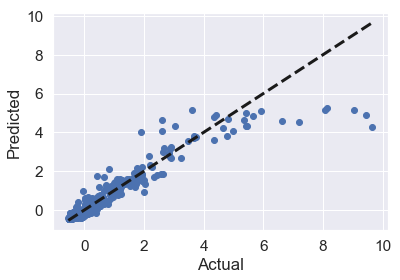

In [185]:
rmse_Ca,r2_Ca= metrics(Y[:,0],Y_train[:,0])

RMSE: 0.9394470480506458 R-squared: 0.10861679485199816


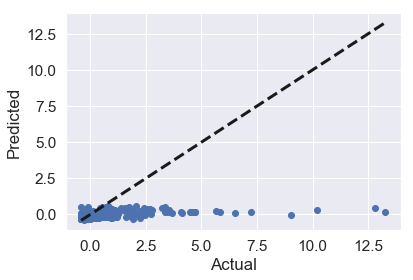

In [186]:
rmse_P,r2_P = metrics(Y[:,1],Y_train[:,1])

RMSE: 0.3420783174562049 R-squared: 0.8616945736242653


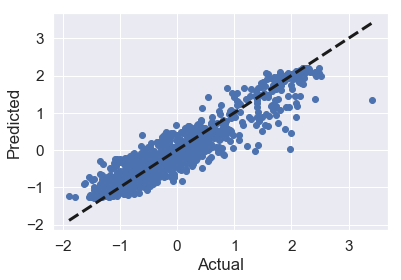

In [187]:
rmse_pH,r2_pH = metrics(Y[:,2],Y_train[:,2])

RMSE: 0.3852978948949496 R-squared: 0.8860682862990865


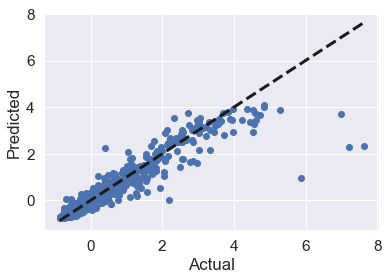

In [188]:
rmse_SOC,r2_SOC = metrics(Y[:,3],Y_train[:,3])

RMSE: 0.2894015603002349 R-squared: 0.9142159568807968


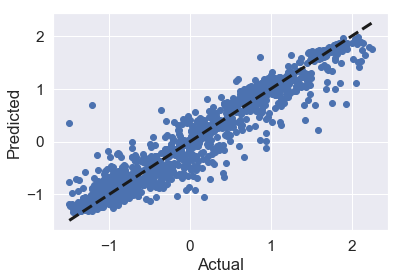

In [189]:
rmse_Sand,r2_Sand = metrics(Y[:,4],Y_train[:,4])

### Comparing Model Performances

In [190]:
RMSE_Ca.append(rmse_Ca)
RMSE_P.append(rmse_P)
RMSE_pH.append(rmse_pH)
RMSE_SOC.append(rmse_SOC)
RMSE_Sand.append(rmse_Sand)

In [191]:
RMSE = np.concatenate((np.array(RMSE_Ca).reshape(-1,1),np.array(RMSE_P).reshape(-1,1),\
                np.array(RMSE_pH).reshape(-1,1),np.array(RMSE_SOC).reshape(-1,1),np.array(RMSE_Sand).reshape(-1,1)),axis=1)

In [193]:
df_RMSE = pd.DataFrame(data=RMSE,columns=target_list,index=model_names+['ML-Ensemble'])
df_RMSE

,Ca,P,pH,SOC,Sand
LinearRegression,0.678147,1.004797,0.619384,0.707805,0.702193
Ridge,0.638560,0.984774,0.572046,0.706161,0.698892
KNN,0.552448,1.080880,0.667183,0.930386,0.951719
SVR_Linear,0.680622,0.925009,0.572630,0.658199,0.630635
SVR_Poly,0.574855,0.950933,0.718784,0.935209,0.906582
SVR_RBF,0.542613,0.924300,0.599064,0.592302,0.748790
BaggingRegressor,0.747915,1.074019,0.652765,0.670533,0.791303
RandomForestRegressor,0.651354,1.037191,0.645085,0.671262,0.781064
ExtraTreeRegressor,0.591490,1.062003,0.632533,0.697976,0.808000
AdaBoostRegressor,0.603120,0.932954,0.622752,0.686551,0.733668


In [194]:
MCRMSE = np.mean(RMSE[-1])
MCRMSE

0.46119808429065784

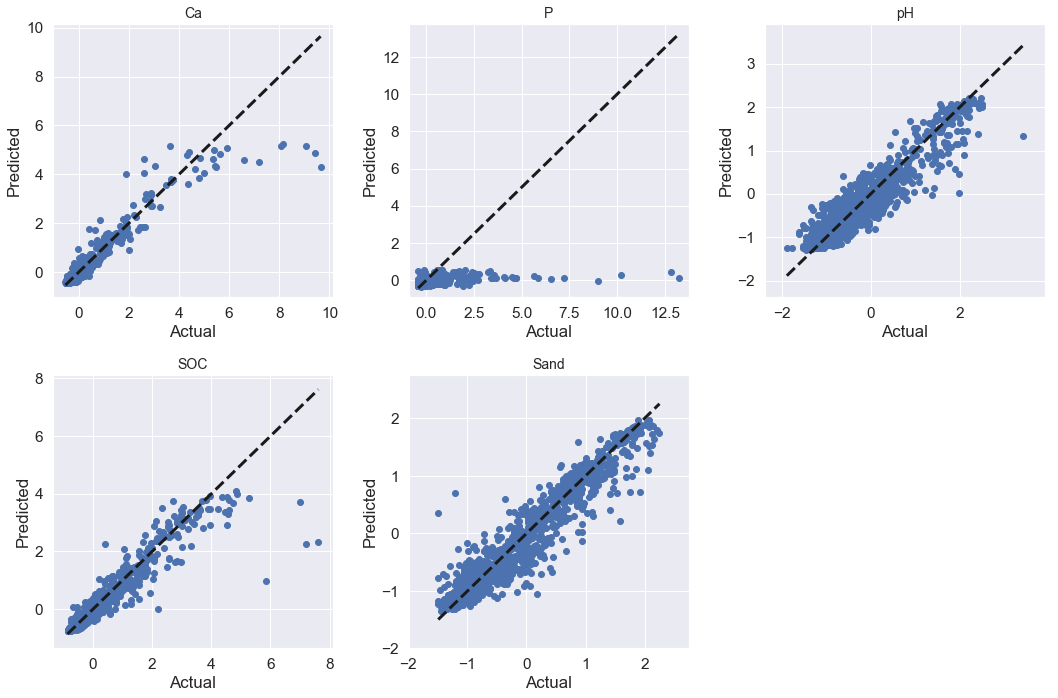

In [197]:
plt.figure(figsize=(15,10))
for i in range(5):
    plt.subplot(2,3,i+1)
    ytrue = Y[:,i]
    yhat  = Y_train[:,i]
    ymin = min(min(ytrue),min(yhat))
    ymax = max(max(ytrue),max(yhat))
    plt.scatter(ytrue,yhat)
    plt.plot([ymin,ymax], [ymin,ymax], 'k--', lw=3)
    plt.xlim(ymin-0.5,ymax+0.5)
    plt.ylim(ymin-0.5,ymax+0.5)
    plt.title(target_list[i],fontsize=14)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    #plt.legend('RMSE:'+str(RMSE[i]))
    #plt.legend('R2-score:'+str(R2[i]))
    #plt.text(0.1, 0.9,'RMSE:',ha='left', va='top')

plt.tight_layout()
plt.show()

### Test Data Predictions

In [152]:
test = pd.read_csv('sorted_test.csv')
test.replace(['Topsoil','Subsoil'], [1,0],inplace=True)
test.head()

,PIDN,m7497.96,m7496.04,m7494.11,m7492.18,m7490.25,m7488.32,m7486.39,m7484.46,m7482.54,...,LSTD,LSTN,REF1,REF2,REF3,REF7,RELI,TMAP,TMFI,Depth
0,09gt9UK5,0.210899,0.209221,0.207645,0.208714,0.211972,0.213562,0.211267,0.208248,0.207341,...,-0.009394,0.197885,-0.622545,-0.548238,-0.637681,-0.413306,-0.130139,0.154013,-0.033905,0
1,0BVvxJ6a,0.191650,0.184120,0.177070,0.180624,0.192343,0.197502,0.187655,0.175447,0.172639,...,-0.277944,-0.851643,-0.792000,-1.058442,-0.792961,-0.785786,-0.588855,0.106200,0.559694,0
2,0KbdgApg,0.083966,0.074740,0.065596,0.069924,0.085145,0.092527,0.080625,0.064768,0.060597,...,-0.443809,-0.628839,-0.754909,-0.926716,-0.865424,-0.607359,-0.334013,-0.021042,0.182431,1
3,0MnuuduB,0.345962,0.338567,0.331786,0.336948,0.350820,0.356365,0.345285,0.332233,0.328589,...,-0.758853,-0.961080,-0.729455,-0.780148,-0.716356,-0.552923,-0.079171,0.394936,0.774477,1
4,0PcIsF9z,0.239019,0.232611,0.226266,0.229921,0.241821,0.247756,0.239242,0.227977,0.224762,...,-1.228289,1.156914,-0.696727,0.080705,0.118012,-0.920363,-0.266055,1.612625,1.199048,0


In [164]:
X_test1 = test.iloc[:,1:3579].values
X_test2 = test.iloc[:,3579:].values
X_test1 = pca.transform(X_test1)
X_test = np.concatenate((X_test1,X_test2),axis=1)
X_test[:,:-1] = sc.transform(X_test[:,:-1])

In [166]:
Y_test = np.zeros((len(X_test),5))
Y_test[:,0] = ensemble_Ca.predict(X_test)
Y_test[:,1] = ensemble_P.predict(X_test)
Y_test[:,2] = ensemble_pH.predict(X_test)
Y_test[:,3] = ensemble_SOC.predict(X_test)
Y_test[:,4] = ensemble_Sand.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\mlens\parallel\_base_functions.py:313: ParameterChangeWarning: Parameter value (10) has changed since model was fitted ('warn').
  (lpar, rpar), ParameterChangeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\mlens\parallel\_base_functions.py:313: ParameterChangeWarning: Parameter value (10) has changed since model was fitted ('warn').
  (lpar, rpar), ParameterChangeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\mlens\parallel\_base_functions.py:313: ParameterChangeWarning: Parameter value (10) has changed since model was fitted ('warn').
  (lpar, rpar), ParameterChangeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\mlens\parallel\_base_functions.py:313: ParameterChangeWarning: Parameter value (10) has changed since model was fitted ('warn').
  (lpar, rpar), ParameterChangeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\mlens\parallel\_base_functions.py:313: ParameterChangeWarning: Parameter value (10) has changed since model w

In [168]:
df_Ytest = pd.DataFrame({'PIDN':test.iloc[:,0],'Ca':Y_test[:,0],'P':Y_test[:,1],\
                              'pH':Y_test[:,2],'SOC':Y_test[:,3],'Sand':Y_test[:,4]})
df_Ytest.to_csv('submission.csv',index=False)
df_Ytest.head()

,PIDN,Ca,P,pH,SOC,Sand
0,09gt9UK5,-0.408879,-0.276113,-0.418750,-0.578614,0.726175
1,0BVvxJ6a,0.257028,-0.124997,0.851189,-0.134006,-0.340428
2,0KbdgApg,-0.228583,-0.225531,0.018548,-0.149393,-0.310689
3,0MnuuduB,-0.195351,-0.263909,0.159122,0.441037,-0.949769
4,0PcIsF9z,-0.363500,-0.245126,-0.901527,0.033339,-0.067160


## Exploring Relationships among Target Variables

### Correlations among Target Variables

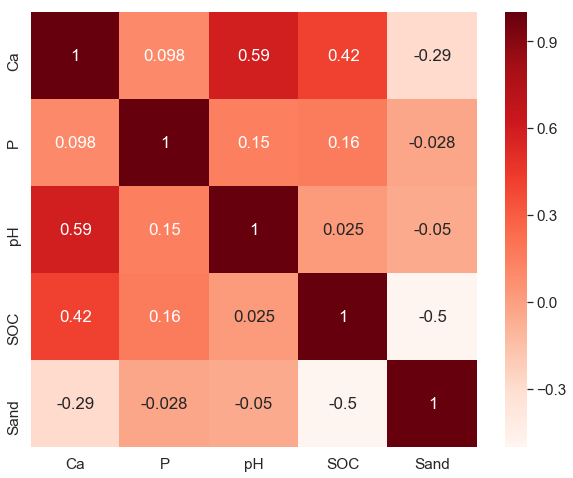

In [169]:
plt.figure(figsize=(10,8))
cor = data.iloc[:,-5:].corr()
sns.set(font_scale=1.4)
sns.heatmap(cor, cmap=plt.cm.Reds,annot=True)

plt.show()

### Clutering

In [170]:
from sklearn.cluster import KMeans

#### Finding Optimal number of Clusters

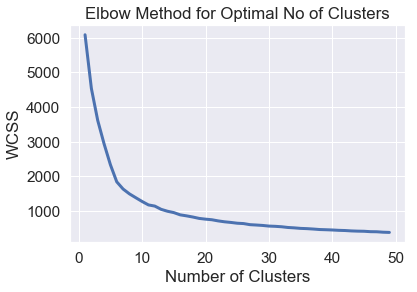

In [172]:
wcss = []
max_clusters = 50
for i in range(1, max_clusters):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(Y)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, max_clusters), wcss,lw=3)
plt.title('Elbow Method for Optimal No of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

#### Training using Optimal Number of Clusters 

In [173]:
kmeans = KMeans(n_clusters = 8, init = 'k-means++', random_state = 42)
kmeans_labels = kmeans.fit_predict(Y)

In [174]:
kmeans.cluster_centers_

array([[-0.37777046, -0.21938501, -0.44909214, -0.38801734, -0.074105  ],
       [-0.04014758, -0.1241622 , -0.57479021,  2.896514  , -0.9283885 ],
       [ 0.74156556,  0.0653573 ,  1.531318  , -0.30577049, -0.39699023],
       [ 0.25826327,  3.14150031,  0.43029179,  0.31703127, -0.17420984],
       [ 4.85985632, -0.19074211,  1.90015412,  2.48349327, -0.96793841],
       [-0.40414479, -0.17263994, -0.1304705 , -0.60966961,  1.28296229],
       [-0.13756042, -0.20924635, -0.45431061,  0.46350362, -0.98149274],
       [ 1.04035037,  9.84007724,  0.63832173,  2.81326816, -0.65479862]])

In [175]:
df_clustering = pd.DataFrame({'Ca':Y[:,0],'P':Y[:,1],'pH':Y[:,2],'SOC':Y[:,3],'Sand':Y[:,4],'Cluster':kmeans_labels})
df_clustering.head()

,Ca,P,pH,SOC,Sand,Cluster
0,-0.295749,-0.041336,-1.129366,0.353258,1.269748,5
1,-0.387442,-0.231552,-1.531538,-0.264023,1.692209,5
2,-0.248601,-0.224635,-0.259551,0.064152,2.091835,5
3,-0.332195,-0.318014,-0.577548,-0.318719,2.118477,5
4,-0.438350,-0.010210,-0.699135,-0.310905,2.164148,5


In [176]:
cluster_labels = df_clustering.groupby(['Cluster']).mean().reset_index()
cluster_labels['Description'] = ['Low-Ca Low-P Neg-pH Low-SOC Mid-Sand',  'Low-Ca Low-P Neg-pH High-SOC Low-Sand',\
                                 'Mid-Ca Mid-P Pos-pH Low-SOC Mid-Sand',  'Mid-Ca Mid-P Pos-pH Mid-SOC Mid-Sand',\
                                 'High-Ca Low-P Pos-pH High-SOC Low-Sand', 'Low-Ca Low-P Neg-pH Low-SOC High-Sand',\
                                 'Low-Ca Low-P Neg-pH Mid-SOC Low-Sand','Mid-Ca High-P Pos-pH High-SOC Low-Sand']
cluster_labels = cluster_labels[['Ca','P','pH','SOC','Sand','Cluster','Description']]
cluster_labels

,Ca,P,pH,SOC,Sand,Cluster,Description
0,-0.377770,-0.219385,-0.449092,-0.388017,-0.074105,0,Low-Ca Low-P Neg-pH Low-SOC Mid-Sand
1,-0.040148,-0.124162,-0.574790,2.896514,-0.928389,1,Low-Ca Low-P Neg-pH High-SOC Low-Sand
2,0.747014,0.068563,1.537137,-0.304553,-0.389595,2,Mid-Ca Mid-P Pos-pH Low-SOC Mid-Sand
3,0.258263,3.141500,0.430292,0.317031,-0.174210,3,Mid-Ca Mid-P Pos-pH Mid-SOC Mid-Sand
4,4.859856,-0.190742,1.900154,2.483493,-0.967938,4,High-Ca Low-P Pos-pH High-SOC Low-Sand
5,-0.404145,-0.172640,-0.130470,-0.609670,1.282962,5,Low-Ca Low-P Neg-pH Low-SOC High-Sand
6,-0.137051,-0.209962,-0.449387,0.459577,-0.983348,6,Low-Ca Low-P Neg-pH Mid-SOC Low-Sand
7,1.040350,9.840077,0.638322,2.813268,-0.654799,7,Mid-Ca High-P Pos-pH High-SOC Low-Sand
